Checking for missing values...
Platform                  0
Post ID                   0
Post Type                 0
Post Content              0
Post Timestamp            0
Likes                     0
Comments                  0
Shares                    0
Impressions               0
Reach                     0
Engagement Rate           0
Audience Age              0
Audience Gender           0
Audience Location         0
Audience Interests        0
Campaign ID           79868
Sentiment             50100
Influencer ID         90006
dtype: int64
Sentiment Counts:
Sentiment
 1    353
-1    340
 0    320
Name: count, dtype: int64
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Confusion Matrix:
[[290  33  30]
 [ 78 245  30]
 [ 82  47 224]]
Classification Report:
              precision    recall  f1-score   support

    Negative       0.64      0.82      0.72       353
     Neutral       0.75      0.69      0.72       353
    Positive       0.79      0.63      0.70       353

 

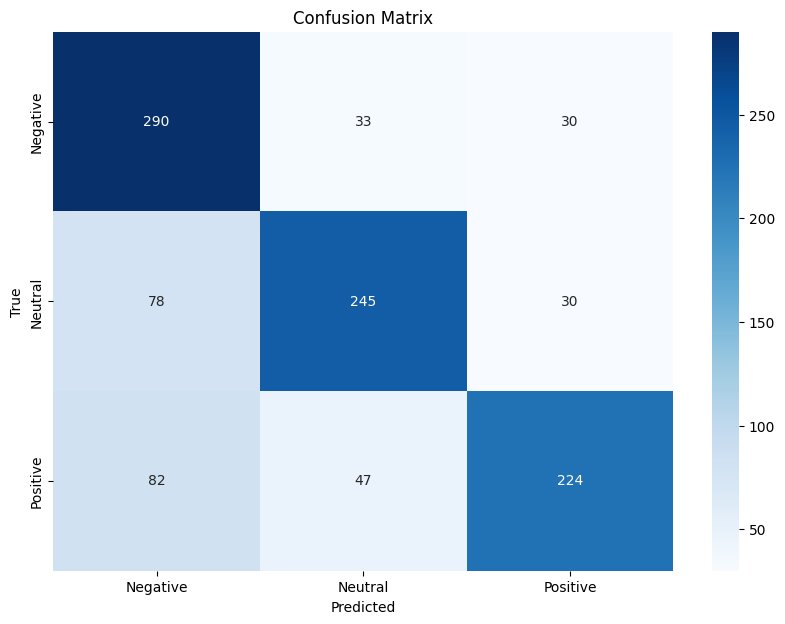

In [10]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
import multiprocessing
import os

# Utilize all processor threads
os.environ['OMP_NUM_THREADS'] = str(multiprocessing.cpu_count())

# Load the data
data = pd.read_csv('archive (1)\\social_media.csv')

# Check for missing values
print("Checking for missing values...")
missing_values = data.isnull().sum()
print(missing_values)

# Handling missing values
data = data.dropna()

# Drop unnecessary columns and keep only 'Sentiment' and 'Post Content'
data = data[['Sentiment', 'Post Content']]

# Assign numeric values to sentiments
sentiment_mapping = {'Positive': 1, 'Negative': -1, 'Neutral': 0}
data['Sentiment'] = data['Sentiment'].map(sentiment_mapping)

# Verify the sentiment counts
print("Sentiment Counts:")
sentiment_counts = data['Sentiment'].value_counts()
print(sentiment_counts)

# Define features and target
X = data['Post Content']
y = data['Sentiment']

# Feature Engineering
vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))  # Using n-grams
X_tfidf = vectorizer.fit_transform(X)

# Balancing the Dataset using SMOTE
smote = SMOTE(random_state=42)
X_tfidf_res, y_res = smote.fit_resample(X_tfidf, y)

# Hyperparameter Tuning for Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_tfidf_res, y_res)

best_clf = grid_search.best_estimator_

# Predictions
y_pred = best_clf.predict(X_tfidf_res)

# Confusion Matrix
cm = confusion_matrix(y_res, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
report = classification_report(y_res, y_pred, target_names=['Negative', 'Neutral', 'Positive'])
print("Classification Report:")
print(report)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
